In [2]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [20]:
# read in the new csv file
df = pd.read_csv('medical_transformed_drop1.csv', index_col=0)
df

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Gender_Male,Gender_Nonbinary
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,...,1,0,1,1,1,0,1,10.59,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,...,0,0,0,0,0,1,0,15.13,0,0
3,3,53,14370,0,18.06,4,0,1,0,2,...,1,0,0,0,0,0,0,4.77,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,...,0,0,0,0,0,1,1,1.71,1,0
5,1,22,1209,0,17.44,5,2,0,0,1,...,0,1,0,0,1,0,0,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,...,0,0,0,1,0,1,0,51.56,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,...,1,0,0,0,0,0,1,68.67,1,0
9998,3,45,65917,1,17.13,4,0,1,0,3,...,0,0,0,1,1,0,0,70.15,0,0


In [21]:
X = df.drop(['Initial_days'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
residuals = model.resid
model_summary = model.summary()

model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1251.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:59:41   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.092e+04
Df Residuals:                    9978   BIC:                         8.108e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 20.1671      1.574     12.816      0.000      17.082      23.252
Children               0.0302      0.064      0.473      0.636      -0.095       0.156
Age                    0.0034      0.007      0.511      0.610      -0.010       0.017
Income             -2.567e-06   4.85e-06     -0.529      0.597   -1.21e-05    6.94e-06
ReAdmis               46.4258      0.287    161.793      0.000      45.863      46.988
VitD_levels           -0.0904      0.069     -1.319      0.187      -0.225       0.044
Doc_visits            -0.1729      0.132     -1.307      0.191      -0.432       0.086
vitD_supp              0.2930      0.220      1.332      0.183      -0.138       0.724
HighBlood             -0.4396      0.281     -1.563      0.118      -0.991       0.112
Stroke                -0.1677      0.346     -0.485      0.628      -0.846       0.511
Complication_risk     -0.3983      0.189     -2.103      0.035      -0.770      -0.027
Overweight            -0.1958      0.305     -0.643      0.520      -0.793       0.401
Arthritis              0.6633      0.289      2.298      0.022       0.098       1.229
Diabetes               0.0037      0.310      0.012      0.990      -0.604       0.612
Hyperlipidemia        -0.4339      0.293     -1.483      0.138      -1.007       0.140
BackPain               0.3146      0.281      1.119      0.263      -0.237       0.866
Anxiety                0.5385      0.296      1.819      0.069      -0.042       1.119
Allergic_rhinitis      0.3978      0.283      1.406      0.160      -0.157       0.952
Reflux_esophagitis     0.3974      0.281      1.415      0.157      -0.153       0.948
Asthma                 0.0539      0.305      0.177      0.860      -0.544       0.652
Gender_Male           -0.0881      0.280     -0.315      0.753      -0.636       0.460
Gender_Nonbinary      -0.2433      0.965     -0.252      0.801      -2.135       1.649
==============================================================================
Omnibus:                     1977.930   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.405
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       4.007   Cond. No.                     5.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# calculate RSE
mse = model.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)


Residual Standard Error (RSE): 13.816250934091325


- The R-squared went from 0.726 to 0.725 
- Adj. R-squared went from 0.725 to 0.724
- The F-statistic went from 714.14 with a Prob (F-statistic) of 0.0 to 1314 with a Prob (F-statistic) of 0.0. The f-statistic increase suggests that the model is a better fit than the previous model.
- The AIC and BIC went from 8.090e+04 and 8.117e+04 to AIC 8.092e+04 and BIC 8.107e+04 are very similar to the previous model.
- Residual Standard Error calculation (RSE): 13.79 to 13.8, almost unchanged
- The condition number went from 8.88e+05 to 5.64e+05 which is a significant improvement, suggesting that the multicollinearity is less of an issue in this model. But still the condition number is high, so multicollinearity may still be a problem.


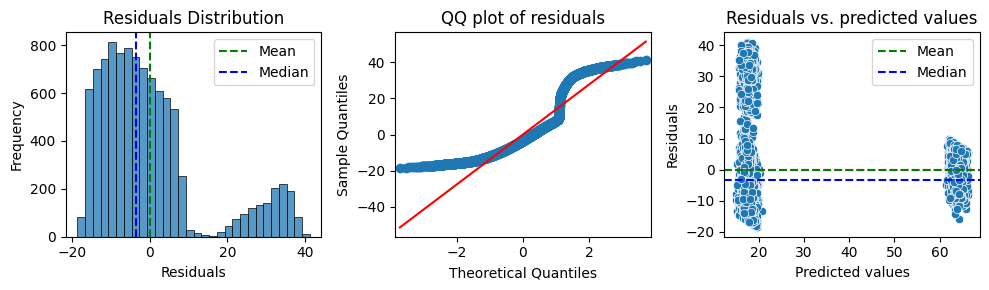

In [23]:
# Calculate the residuals
#residuals = Y - predictions

# Plot the residuals
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Residuals Distribution
sns.histplot(residuals, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# Add mean and median lines to the histogram
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[0].axvline(x=mean_residuals, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs. predicted values")

# Add mean and median lines to the residuals plot
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[2].axhline(y=mean_residuals, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

- Not much has changed in our residual plots. Although our model is slightly improved according to the F-statistic, the R-squared and the condition number, the residual plots are still showing some patterns that suggest that the model is not capturing all the information in the data.

- Let's check VIF values for each of the predictors again to see if we gain ant new insights.


In [15]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)


,variables,VIF
0,const,129.727015
20,Gender_Male,1.022089
21,Gender_Nonbinary,1.021966
15,BackPain,1.003004
13,Diabetes,1.002739
2,Age,1.002475
14,Hyperlipidemia,1.002397
19,Asthma,1.002384
11,Overweight,1.002341
18,Reflux_esophagitis,1.002326


- The VIF values for the predictors are all essentially 1. 
- Given this information, re-examining the p-values of the predictors and their coefficients, we can eliminate the predictors with the highest p-values and lower coefficients  to see if that improves the model. Here we have to be careful, because predictors with high p-values may still be important for the model. Examining the p-values and the coefficients together, 

- After reviewing p-values and coefficients, I am choosing to remove based on coefficient as it is associated with higher p-values. 
- Eliminate those variables with `coefficients less than an absolute value of 0.4`.

In [24]:
# statistically significant variables
significant_vars = model.params[model.params.abs() > 0.4].index.tolist()

# Remove 'const' from the list as we manually add it for the intercept
if 'const' in significant_vars:
    significant_vars.remove('const')

print('Significant variables:', significant_vars)


Significant variables: ['ReAdmis', 'HighBlood', 'Arthritis', 'Hyperlipidemia', 'Anxiety']


In [25]:
# Create a reduced model with only significant variables above
X_reduced = X[significant_vars]

# Fit the OLS model with reduced variables
model_reduced = sm.OLS(Y, sm.add_constant(X_reduced)).fit()

# Print the summary of the reduced model
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5252.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:00:07   Log-Likelihood:                -40445.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9994   BIC:                         8.095e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.3266      0.269     64.387      0.000      16.799      17.854
ReAdmis           46.4413      0.287    161.990      0.000      45.879      47.003
HighBlood         -0.4551      0.281     -1.619      0.105      -1.006       0.096
Arthritis          0.6742      0.288      2.338      0.019       0.109       1.239
Hyperlipidemia    -0.4176      0.292     -1.429      0.153      -0.991       0.155
Anxiety            0.5454      0.296      1.843      0.065      -0.035       1.125
==============================================================================
Omnibus:                     1986.555   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3396.713
Skew:                           1.335   Prob(JB):                         0.00
Kurtosis:                       4.013   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# calculate RSE
mse = model_reduced.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.816762081780023


In [28]:
residuals_reduced = model_reduced.resid
residuals_reduced

CaseOrder
1        -7.501182
2        -1.741505
3       -12.101505
4       -16.290821
5       -15.659016
           ...    
9996     34.143050
9997      4.683002
9998      6.291788
9999     -0.407851
10000     6.825491
Length: 10000, dtype: float64

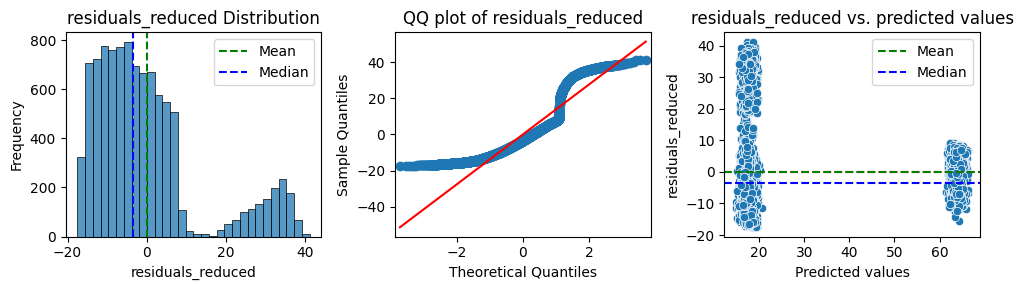

In [34]:
# Plot the residuals_reduced
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# residuals_reduced Distribution
sns.histplot(residuals_reduced, bins=30, ax=axes[0])
axes[0].set_xlabel('residuals_reduced')
axes[0].set_ylabel('Frequency')
axes[0].set_title('residuals_reduced Distribution')

# Add mean and median lines to the histogram
mean_residuals_reduced = residuals_reduced.mean()
median_residuals_reduced = residuals_reduced.median()
axes[0].axvline(x=mean_residuals_reduced, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals_reduced, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals_reduced
sm.qqplot(residuals_reduced, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals_reduced")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals_reduced, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("residuals_reduced")
axes[2].set_title("residuals_reduced vs. predicted values")

# Add mean and median lines to the residuals_reduced plot
mean_residuals_reduced = residuals_reduced.mean()
median_residuals_reduced = residuals_reduced.median()
axes[2].axhline(y=mean_residuals_reduced, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals_reduced, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

# Reduced model
- The R-squared went from 0.726 to 0.725 to `0.724`
- Adj. R-squared went from 0.725 to 0.724 to `0.724` as well.
- The F-statistic went from 714.14 to 1314 to `5252` all with a Prob (F-statistic) of 0.0. The f-statistic increase suggests that the model is a much better fit than the previous model.
- The AIC and BIC went from 8.090e+04 and 8.117e+04 to AIC 8.092e+04 and BIC 8.107e+04 to `AIC 8.090e+04` and `BIC 8.095e+04`, very close to each other.
- Residual Standard Error calculation (RSE): 13.79 to remain at `13.8` no matter the model change.
- The condition number went from 8.88e+05 to 5.64e+05 to `3.63` suggesting that the multicollinearity is less of an issue in this model. Likely helped by the remove of features.

- ### Initial_days = 17.3266 + 46.4413(ReAdmis) + 0.0035(Age) - 0.4551(HighBlood) + 0.6742(Arthritis) - 0.4176(Hyperlipidemia) + 0.5454(Anxiety) + error term

# Conclusion

### G & H: References

- Western Governors University. (2023, December 21). D207 - Medical_clean Dataset. Retrieved from https://lrps.wgu.edu/provision/227079957

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#

- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Sewell, Dr. (2023). WGU D207 Exploratory Data Analysis [Webinars]. WGU Webex. Accessed December, 2023. https://wgu.webex.com/webappng/sites/wgu/meeting/info/c4aca2eac546482880f1557c938abf40?siteurl=wgu&MTID=me73470c2eac9e863c6f47a3d5b6d2f26 

- Seaborn Developers. (2023). seaborn.scatterplot — seaborn 0.11.2 documentation. Retrieved December 22, 2023, from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

OLD ABOVE _ DELETE?KEEP? as needed.

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- Pennsylvania State University. (n.d.). *5.3 - The Multiple Linear Regression Model*. STAT 501. Retrieved March 10, 2024, from online.stat.psu.edu/stat501/lesson/5/5.3

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html



In [33]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


0

# Limitations

Beware of the following with your regression analysis:

Overfitting can occur due to limited data points.

Multicollinearity occurs when high association (correlation) with other IVs.

P-values can be unreliable and coefficients swing wildly

Check for pairwise correlations and high VIF (> 10)

Tune your model with as many variables as practical. Forward, backward, stepwise
    regression based on AIC, BIC, etc.
ppoint 5 https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

# Errata n notes

I'm wrapping up task 1, and my research question is 'what factors influence the total charge a patient receives'. Total charge has a bimodal distribution that I did a log transform on which helped tremendously. Regarding my final reduced model, the RSE is pretty good, both residual normality and homoscedasticity are mostly there. Both have slight variance from expectations around the tails. For fun I decided to re run my code but filtered my data for patients staying less than a month and it improved my RSE, normality and homoscedasticity. Should I change my research question or keep it broad and just explain the limitations of outlier patients?


